<a href="https://colab.research.google.com/github/BrunoASNascimento/bootcamp-datascience-alura/blob/main/modulo_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Pandas options

In [4]:
pd.options.display.float_format = "{:.2f}".format

#Read data
This dataset is on GitHub.

Font: https://datasus.saude.gov.br/acesso-a-informacao/producao-hospitalar-sih-sus/

In [6]:
data = pd.read_csv(
    'https://raw.githubusercontent.com/BrunoASNascimento/bootcamp-datascience-alura/main/data/procedimentos_sus_internacao_valor_total_ano_mes_processamento.csv',
    sep=';',
    skiprows=3,
    skipfooter=12,
    encoding='ISO-8859-1',
    thousands=".",
    decimal=","
)
data.replace('-',np.nan,inplace=True)
data[data.columns[1:]]=data[data.columns[1:]].astype("float")
data

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,...,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,929129659.72
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,...,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,nan,420668039.63
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,...,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1771654871.23
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,...,3097113.21,3059823.80,2912519.98,2937346.43,2868820.96,2752228.26,3401864.29,3015488.30,2826486.18,305010883.18
4,15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,...,35925899.01,34345207.63,37384336.94,35512568.15,28217249.66,32617541.05,41625331.28,38438873.79,39911193.02,4437115730.71
5,16 Amapá,1120973.34,1268740.33,974651.24,1141137.32,866346.18,1440978.95,1426659.48,1475551.38,1651341.43,...,2296699.42,2333822.65,2310195.65,1842472.54,1705873.64,2065055.35,2009912.57,3249565.87,2942273.94,291637984.75
6,17 Tocantins,3441592.69,4985688.85,6205612.60,4984482.09,5511002.46,4927934.22,5445602.28,5413710.38,5596669.50,...,7210731.09,8096781.90,7022324.92,7209045.59,6390358.03,6697839.73,7384806.71,9131707.60,8240261.38,999998621.85
7,21 Maranhão,10723506.39,13559679.41,13985142.36,14809416.46,14505727.38,14908091.32,15784899.40,15195312.89,14951277.75,...,29445106.74,30003061.50,29680064.33,28779088.94,24792925.68,30512523.70,33099356.79,32936503.37,28587541.78,3632860959.84
8,22 Piauí,7985142.43,10079928.25,10298372.45,10775976.33,10398360.88,10528253.88,11040107.92,10549176.40,10899198.97,...,17641837.23,16229473.38,16851334.11,14568254.23,12224393.97,12658280.69,14547134.38,17871598.61,23210624.20,2130616492.35
9,23 Ceará,15539821.90,25735101.55,28724625.75,30676457.06,30604453.47,31272395.18,30925391.36,27851438.72,30362719.90,...,50834117.85,50622973.33,50719494.87,46991314.91,44964787.45,46197393.28,54409441.05,55180751.48,59808605.59,6197357245.98


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 154 entries, Unidade da Federação to Total
dtypes: float64(153), object(1)
memory usage: 32.6+ KB


In [10]:
data.mean()

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Mai     44193633.75
2020/Jun     47329994.46
2020/Jul     54495511.57
2020/Ago     56505034.29
Total      5993731798.30
Length: 153, dtype: float64

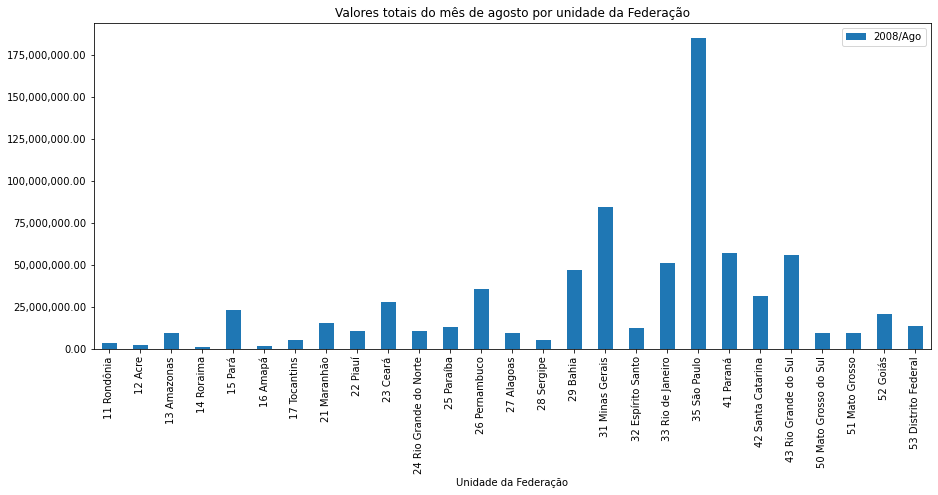

In [12]:
ax = data.plot(x="Unidade da Federação",y="2008/Ago",kind="bar",figsize=(15,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Valores totais do mês de agosto por unidade da Federação")
plt.show()

2020/Ago


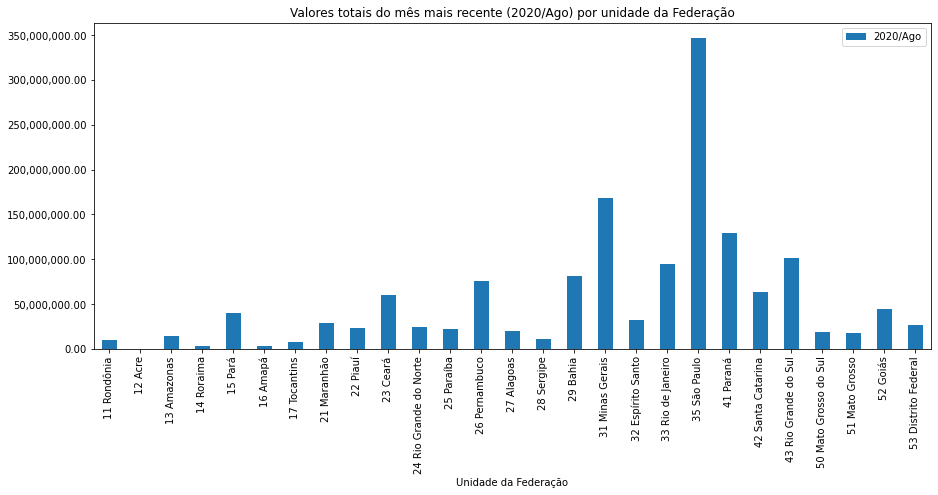

In [14]:
last_date = list(data.columns)[len(data.columns)-2]
print(last_date)
ax = data.plot(x="Unidade da Federação",y="2020/Ago",kind="bar",figsize=(15,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title(f"Valores totais do mês mais recente ({last_date}) por unidade da Federação")
plt.show()